## Supervised Learning (Regression)

> **Supervised learning** is a type of Machine Learning invlolving learning a function that maps inputs to outputs based on provided  input-output pairs. Learning == Model Training.

<img src = "https://www.researchgate.net/publication/324426321/figure/fig4/AS:614073280507906@1523417887240/Typical-Flow-chart-of-a-supervised-learning-classification-algorithm.png" width="400">

> **Regression** - a type of supervised learning used to predict continuous (dependent) variable given a set of independent variables. 

> *Mathematical expression*: **Y = βo + β1X + ∈** where; 
>   * ...
    * Y - Dependent variable(Target, Predicted) - the variable we predict.
    * X - Independent variable(predictor) - the variable we use to make a prediction.
    * βo - This is the intercept term. It is the prediction value you get when X = 0
    * β1 - This is the slope term. It explains the change in Y when X changes by 1 unit.
    * ∈ - This represents the residual value, i.e. the difference between actual and predicted values.(error term).
    
>                       β1 = Σ(xi - xmean)(yi-ymean)/ Σ (xi - xmean)² where i= 1 to n (no. of obs.)

                        βo = ymean - β1(xmean)  
> expression for multiple regression (when we have more than one predictor variables - typical case): **y = βo + β1x1 + β2x2 + … + βnxn + c.**
>   * ...
    * βn - This is the slope term. It explains the change in Y when Xn changes by 1 unit.
 
    
> **Error term minimisation - Ordinary Least Squares(OLS)** - OLS technique tries to reduce the sum of squared errors ∑[Actual(y) - Predicted(y')]² by finding the best possible value of regression coefficients (β0, β1, etc).
> Why OLS:
1. It uses squared error which has nice mathematical properties, thereby making it easier to differentiate and compute gradient descent.
2. OLS is easy to analyze and computationally faster, i.e. it can be quickly applied to data sets having 1000s of features.
3. Interpretation of OLS is much easier than other regression techniques.

> **Assumptions**:
* ...
* There exists a **linear** and **additive** relationship between dependent and independent variables. By linear, it means that the change in DV by 1 unit change in IV is constant. By additive, it refers to the effect of X on Y is independent of other variables.
* There must be **no correlation** among independent variables. Presence of correlation in independent variables lead to Multicollinearity. If variables are correlated, it becomes extremely difficult for the model to determine the true effect of IVs on DV.
* The error terms must possess constant variance. Absence of constant variance leads to **heteroskedestacity**. (Heteroskedastic refers to a condition in which the variance of the residual term, or error term, in a regression model varies widely. 
* The error terms must be uncorrelated i.e. error at **∈t** must not indicate the error at **∈t+1**. Presence of correlation in error terms is known as **Autocorrelation**. It drastically affects the regression coefficients and standard error values since they are based on the assumption of uncorrelated error terms.
* The dependent variable and the error terms must possess a **normal distribution**.

> **Examples of regression problems**:
* Prediction of house prices.
* Prediction of loan eligibility amount.
* Salary prediction.

#### SLR Model

In [2]:
import pandas as pd

data = pd.read_csv('/home/ada/teacherOn/Ola McCartney/Intermediate ML/datasets/trains.csv')
print(data.shape)
data.head(5)

/home/ada/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(1017209, 9)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [4]:
data.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [5]:
# changing date dtype
data['Date'] = pd.to_datetime(data.Date)

# extracting variables from date column
data['Month'] = data['Date'].dt.month.to_list()
data['Year'] = data['Date'].dt.year.to_list()
data['Day'] = data['Date'].dt.day.to_list()
data['WeekOfYear'] = data['Date'].dt.weekofyear.to_list()
data['DayOfWeek'] = data['Date'].dt.dayofweek.to_list()

# weekday or not weekday
data['weekday'] = 1        # Initialize the column with default value of 1
data.loc[data['DayOfWeek'] == 5, 'weekday'] = 0
data.loc[data['DayOfWeek'] == 6, 'weekday'] = 0

# selection
data = data.drop(['Store', 'Date'], axis = 1)
data.shape

# encoding categorical columns
data = pd.get_dummies(data)

# scaling/normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(data)
data = pd.DataFrame(scaled, columns = data.columns)

In [6]:
data.head()

,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Month,Year,Day,WeekOfYear,weekday,StateHoliday_0,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,0.501484,-0.132683,-0.168269,0.452399,1.273237,2.144211,0.346724,1.502077,1.740766,0.511626,0.630672,-0.384596,0.435427,-0.142555,-0.081366,-0.063616
1,0.501484,0.075373,-0.017540,0.452399,1.273237,2.144211,0.346724,1.502077,1.740766,0.511626,0.630672,-0.384596,0.435427,-0.142555,-0.081366,-0.063616
2,0.501484,0.659800,0.404499,0.452399,1.273237,2.144211,0.346724,1.502077,1.740766,0.511626,0.630672,-0.384596,0.435427,-0.142555,-0.081366,-0.063616
3,0.501484,2.135414,1.862258,0.452399,1.273237,2.144211,0.346724,1.502077,1.740766,0.511626,0.630672,-0.384596,0.435427,-0.142555,-0.081366,-0.063616
4,0.501484,-0.247231,-0.159656,0.452399,1.273237,2.144211,0.346724,1.502077,1.740766,0.511626,0.630672,-0.384596,0.435427,-0.142555,-0.081366,-0.063616


In [8]:
# seperating data set into dependent and independent variables
x = data.drop(['Sales'], axis = 1)
y = data[['Sales']]

##splitting data set to train and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((712046, 15), (712046, 1), (305163, 15), (305163, 1))

In [9]:
# straight-forward modeling
from sklearn.linear_model import LinearRegression

# creating our model
regressor = LinearRegression()

# model training/fitting
regressor = regressor.fit(x_train, y_train)

# running predictions
y_pred = regressor.predict(x_test)
print(y_pred.shape)
y_pred[:5]

(305163, 1)


array([[ 0.10934629],
       [-1.26727961],
       [-1.55584918],
       [-1.56928502],
       [-0.18615351]])

In [ ]:
# evaluation

#### Cross Validation
> Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. 

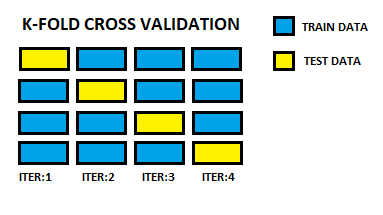

In [10]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [14]:
# use of cross validation (kfolds)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

model = LinearRegression()
# create a KFold object with 7 splits 
folds = KFold(n_splits = 4, shuffle = True, random_state = 0)
scores = -1 * cross_val_score(model, x_train, y_train, scoring='neg_mean_absolute_error', cv=folds)
scores   

array([0.25479797, 0.25518133, 0.25556177, 0.25499906])

#### Decision Trees Regressors

> Decision tree builds classification or regression models in the form of a tree structure. It breaks down a data set into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. A **decision node** has two or more branches. **Leaf node** represents a classification or decision. The topmost decision node in a tree which corresponds to the best predictor called **root node**. Decision trees can handle both categorical and numerical data.

<img src = "https://miro.medium.com/max/410/1*JAEY3KP7TU2Q6HN6LasMrw.png">

> parameters:
* ...
* criterion - “mse”, “friedman_mse”, “mae”; default=”mse” (measure to measure quality of split).
* splitter - “best”, “random”, default=”best”; (strategy used to choose split at each node).
* max_depth - default = NOne; how deep should the tree be splitted.
* min_samples_split - The minimum number of samples required to split an internal node.

In [59]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state = 42)
# create a KFold object with 7 splits 
folds = KFold(n_splits = 7, shuffle = True, random_state = 42)
scores = -1 * cross_val_score(model, x_train, y_train, scoring='neg_mean_absolute_error', cv=folds)
scores  
model.predict()

array([0.30352325, 0.30551269, 0.30407528, 0.30470512, 0.30219021,
       0.30423503, 0.30352589])

#### Naive Bayes Regressors

#### Gradient Boosting Regressors

#### SVM Regressors

### Model Evaluation (Loss Functions)